# CNN + OOD

- 지도학습 + 비지도학습

## MySQL에서 데이터 로드 

In [ ]:
#pip install pymysql

In [57]:
#pip install seaborn

In [1]:
import pymysql
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [11]:
import config 
from config import DB_CONFIG
import pymysql  

# MySQL 연결
conn = pymysql.connect(
    host=DB_CONFIG['host'],
    user=DB_CONFIG['user'],
    password=DB_CONFIG['password'],
    database=DB_CONFIG['database'],
    port=DB_CONFIG['port']
)

car_siren = f"SELECT * FROM merge50_car_siren"
car_horn = f"SELECT * FROM merge50_car_horn"
car_driving = f'SELECT * FROM merge50_car_driving'
motorcycle_horn  = f'SELECT * FROM merge50_motorcycle_horn'
motorcycle_driving  = f'SELECT * FROM merge50_motorcycle_driving'

car_siren_df =  pd.read_sql(car_siren, conn)
car_horn_df = pd.read_sql(car_horn, conn) 
car_driving_df = pd.read_sql(car_driving, conn) 
motorcycle_horn_df= pd.read_sql(motorcycle_horn, conn) 
motorcycle_driving_df = pd.read_sql(motorcycle_driving, conn) 

conn.close()

/tmp/ipykernel_25295/1259335500.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_siren_df =  pd.read_sql(car_siren, conn)
/tmp/ipykernel_25295/1259335500.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_horn_df = pd.read_sql(car_horn, conn)
/tmp/ipykernel_25295/1259335500.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_driving_df = pd.read_sql(car_driving, conn)
/tmp/ipykernel_25295/1259335500.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI 

# EDA 및 전처리

In [26]:
print(f'car_siren 데이터 개수: {car_siren_df.shape[0]}')
print(f'car_horn 데이터 개수: {car_horn_df.shape[0]}')
print(f'car_driving 데이터 개수: {car_driving_df.shape[0]}')
print(f'motorcycle_horn 데이터 개수: {motorcycle_horn_df.shape[0]}')
print(f'motorcycle_driving 데이터 개수: {motorcycle_driving_df.shape[0]}')

car_siren 데이터 개수: 1990
car_horn 데이터 개수: 3189
car_driving 데이터 개수: 1682
motorcycle_horn 데이터 개수: 4560
motorcycle_driving 데이터 개수: 4735


In [27]:
print(f'car_siren 데이터 열 개수: {car_siren_df.shape[1]}')
print(f'car_horn 데이터 열 개수: {car_horn_df.shape[1]}')
print(f'car_driving 데이터 열 개수: {car_driving_df.shape[1]}')
print(f'motorcycle_horn 데이터 열 개수: {motorcycle_horn_df.shape[1]}')
print(f'motorcycle_driving 데이터 열 개수: {motorcycle_driving_df.shape[1]}')

car_siren 데이터 열 개수: 82
car_horn 데이터 열 개수: 82
car_driving 데이터 열 개수: 82
motorcycle_horn 데이터 열 개수: 82
motorcycle_driving 데이터 열 개수: 82


In [28]:
car_horn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3189 entries, 0 to 3188
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fileName       3189 non-null   object 
 1   labelName      3189 non-null   object 
 2   area_start     3189 non-null   float64
 3   area_end       3189 non-null   float64
 4   category_01    3189 non-null   object 
 5   category_02    3189 non-null   object 
 6   category_03    3189 non-null   object 
 7   decibel        3189 non-null   int64  
 8   soundQuality   3189 non-null   object 
 9   subCategory    3189 non-null   object 
 10  bitRate        3189 non-null   object 
 11  duration       3189 non-null   float64
 12  fileFormat     3189 non-null   object 
 13  fileSize       3189 non-null   int64  
 14  recodingType   3189 non-null   object 
 15  sampleRate     3189 non-null   object 
 16  acqDevice      3189 non-null   object 
 17  acqMethod      3189 non-null   object 
 18  acqType 

In [29]:
car_horn_df.head()

,fileName,labelName,area_start,area_end,category_01,category_02,category_03,decibel,soundQuality,subCategory,...,mfcc_41,mfcc_42,mfcc_43,mfcc_44,mfcc_45,mfcc_46,mfcc_47,mfcc_48,mfcc_49,mfcc_50
0,1.car_horn_87900_1.wav,1.car_horn_87900_1.wav,2.0,58.719,교통소음,자동차,차량경적,116,정상,소형차경적,...,-1.194056,-0.757743,-2.858810,-5.101422,-0.198150,7.001447,6.203896,-2.862313,-10.336964,-8.593492
1,1.car_horn_87964_1.wav,1.car_horn_87964_1.wav,2.0,59.747,교통소음,자동차,차량경적,102,정상,소형차경적,...,-7.923782,8.347244,-2.440833,-17.408949,-5.891588,22.778133,21.374588,-19.310514,-26.457247,4.794274
2,1.car_horn_87987_1.wav,1.car_horn_87987_1.wav,2.0,59.217,교통소음,자동차,차량경적,112,정상,소형차경적,...,-5.953082,1.538178,-0.032047,-10.759938,-10.296665,14.938017,19.099138,-5.256958,-27.792421,-7.377015
3,1.car_horn_88000_1.wav,1.car_horn_88000_1.wav,2.0,57.389,교통소음,자동차,차량경적,112,정상,소형차경적,...,-5.018665,2.996135,-0.142866,-8.995171,-4.227169,8.116351,11.163322,-4.992955,-16.359087,-5.441961
4,1.car_horn_88001_1.wav,1.car_horn_88001_1.wav,2.0,58.207,교통소음,자동차,차량경적,122,정상,소형차경적,...,-5.330876,2.107300,1.768516,-10.489394,-4.815802,9.592706,12.866017,-3.469832,-20.286922,-6.563427


In [31]:
car_horn_df.iloc[ : ,-50:] 

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_41,mfcc_42,mfcc_43,mfcc_44,mfcc_45,mfcc_46,mfcc_47,mfcc_48,mfcc_49,mfcc_50
0,-391.00430,107.641975,64.204640,33.718952,20.630340,13.337987,9.100019,8.873220,9.340549,8.287990,...,-1.194056,-0.757743,-2.858810,-5.101422,-0.198150,7.001447,6.203896,-2.862313,-10.336964,-8.593492
1,-233.66284,87.917620,45.434906,19.435001,9.098841,32.400368,5.817845,9.204194,14.611247,20.294502,...,-7.923782,8.347244,-2.440833,-17.408949,-5.891588,22.778133,21.374588,-19.310514,-26.457247,4.794274
2,-318.16153,126.123180,43.729805,-11.429483,-5.223235,13.667998,0.934844,10.497743,2.401143,22.281258,...,-5.953082,1.538178,-0.032047,-10.759938,-10.296665,14.938017,19.099138,-5.256958,-27.792421,-7.377015
3,-385.20926,140.265410,57.263832,-7.932145,-3.877982,14.155136,6.298158,11.397833,2.566783,15.076704,...,-5.018665,2.996135,-0.142866,-8.995171,-4.227169,8.116351,11.163322,-4.992955,-16.359087,-5.441961
4,-382.12450,150.004900,61.439040,-17.890905,-7.740589,15.947204,3.806582,7.909450,2.633213,14.426663,...,-5.330876,2.107300,1.768516,-10.489394,-4.815802,9.592706,12.866017,-3.469832,-20.286922,-6.563427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,-99.19382,119.270660,-76.342830,14.679804,-26.403290,5.220899,-15.944427,-0.425459,-14.378425,-2.452169,...,1.322109,-1.603073,-0.969422,-0.030491,-3.283236,-4.058084,-2.597992,-0.028827,1.399276,-4.661576
3185,-292.45557,203.069000,-53.426810,37.105576,6.516268,10.316400,11.667080,1.168588,17.977980,5.434537,...,0.412159,-0.795219,-1.426503,-3.167590,-2.035457,0.571453,4.668703,3.238892,-5.142219,-4.995093
3186,-198.79451,201.686460,-87.792480,-11.408583,-14.657739,-5.088332,-0.388612,-13.570362,6.362044,-11.089597,...,-1.205375,0.633744,2.143693,-4.530044,-7.654323,3.844430,9.282047,2.180258,-6.707889,-3.188458
3187,-247.43971,186.716000,-45.675808,47.491760,18.612213,16.028240,8.016017,3.121070,13.013415,4.386095,...,0.659112,-2.346271,-1.647404,-0.503469,0.055166,-0.353136,-0.114590,1.304396,0.613524,-0.592904


In [32]:
#데이터프레임 병합 
df_combined = pd.concat([car_horn_df, car_siren_df,car_driving_df,motorcycle_horn_df,motorcycle_driving_df], ignore_index=True)

print(f'df_combined 행 개수: {len(df_combined)}') 
df_combined.head()

df_combined 행 개수: 16156


,fileName,labelName,area_start,area_end,category_01,category_02,category_03,decibel,soundQuality,subCategory,...,mfcc_41,mfcc_42,mfcc_43,mfcc_44,mfcc_45,mfcc_46,mfcc_47,mfcc_48,mfcc_49,mfcc_50
0,1.car_horn_87900_1.wav,1.car_horn_87900_1.wav,2.0,58.719,교통소음,자동차,차량경적,116,정상,소형차경적,...,-1.194056,-0.757743,-2.858810,-5.101422,-0.198150,7.001447,6.203896,-2.862313,-10.336964,-8.593492
1,1.car_horn_87964_1.wav,1.car_horn_87964_1.wav,2.0,59.747,교통소음,자동차,차량경적,102,정상,소형차경적,...,-7.923782,8.347244,-2.440833,-17.408949,-5.891588,22.778133,21.374588,-19.310514,-26.457247,4.794274
2,1.car_horn_87987_1.wav,1.car_horn_87987_1.wav,2.0,59.217,교통소음,자동차,차량경적,112,정상,소형차경적,...,-5.953082,1.538178,-0.032047,-10.759938,-10.296665,14.938017,19.099138,-5.256958,-27.792421,-7.377015
3,1.car_horn_88000_1.wav,1.car_horn_88000_1.wav,2.0,57.389,교통소음,자동차,차량경적,112,정상,소형차경적,...,-5.018665,2.996135,-0.142866,-8.995171,-4.227169,8.116351,11.163322,-4.992955,-16.359087,-5.441961
4,1.car_horn_88001_1.wav,1.car_horn_88001_1.wav,2.0,58.207,교통소음,자동차,차량경적,122,정상,소형차경적,...,-5.330876,2.107300,1.768516,-10.489394,-4.815802,9.592706,12.866017,-3.469832,-20.286922,-6.563427


In [33]:
df_combined.iloc[ : ,-50:] 

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_41,mfcc_42,mfcc_43,mfcc_44,mfcc_45,mfcc_46,mfcc_47,mfcc_48,mfcc_49,mfcc_50
0,-391.00430,107.641975,64.204640,33.718952,20.630340,13.337987,9.100019,8.873220,9.340549,8.287990,...,-1.194056,-0.757743,-2.858810,-5.101422,-0.198150,7.001447,6.203896,-2.862313,-10.336964,-8.593492
1,-233.66284,87.917620,45.434906,19.435001,9.098841,32.400368,5.817845,9.204194,14.611247,20.294502,...,-7.923782,8.347244,-2.440833,-17.408949,-5.891588,22.778133,21.374588,-19.310514,-26.457247,4.794274
2,-318.16153,126.123180,43.729805,-11.429483,-5.223235,13.667998,0.934844,10.497743,2.401143,22.281258,...,-5.953082,1.538178,-0.032047,-10.759938,-10.296665,14.938017,19.099138,-5.256958,-27.792421,-7.377015
3,-385.20926,140.265410,57.263832,-7.932145,-3.877982,14.155136,6.298158,11.397833,2.566783,15.076704,...,-5.018665,2.996135,-0.142866,-8.995171,-4.227169,8.116351,11.163322,-4.992955,-16.359087,-5.441961
4,-382.12450,150.004900,61.439040,-17.890905,-7.740589,15.947204,3.806582,7.909450,2.633213,14.426663,...,-5.330876,2.107300,1.768516,-10.489394,-4.815802,9.592706,12.866017,-3.469832,-20.286922,-6.563427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16151,-134.79400,167.532800,7.216292,15.758182,18.004358,3.681938,0.359724,0.995183,-16.901344,-5.779024,...,0.148856,2.617479,-0.394380,0.228787,-0.813453,-1.134764,-0.864591,1.662077,-0.654128,0.215723
16152,-214.37556,137.193790,-15.827540,37.033820,-14.496526,32.809563,-7.713640,2.952441,1.501028,0.895649,...,-1.110981,-0.138743,-0.092305,-1.805980,-0.590370,-0.420101,0.680311,-0.311218,-0.129329,-1.615104
16153,-152.88358,141.889480,-68.941160,7.881523,-29.909588,-7.438705,-22.051588,-8.616838,-16.056900,-6.231401,...,-3.755298,-2.622874,-2.315738,-3.121662,-4.175147,-4.395317,-3.526200,-4.390431,-3.562070,-4.967227
16154,-150.00578,138.438980,-60.815014,26.880222,-13.217022,4.150313,-13.740492,-1.927542,-17.932528,-3.447675,...,-2.461309,-0.614726,-2.006001,-1.224681,-1.578365,-1.270139,-1.381948,-0.736268,0.244385,0.520519


# 모델링

In [16]:
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # warning 메시지 숨기기

import tensorflow as tf
print("Is GPU available:", tf.test.is_gpu_available())

import tensorflow as tf
print('tf.__version__:',tf.__version__)

2025-02-27 15:24:41.509551: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-27 15:24:41.556124: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-27 15:24:42.271919: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is GPU available: True
tf.__version__: 2.13.0


2025-02-27 15:24:43.266806: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-27 15:24:43.376076: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-27 15:24:43.378844: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [17]:
tf.config.set_visible_devices([], 'GPU')

2025-02-27 15:24:45.479489: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-27 15:24:45.481376: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-27 15:24:45.483314: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [18]:
!nvidia-smi

Thu Feb 27 15:24:47 2025       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:1E.0 Off |                    0 |
| N/A   29C    P0    24W /  70W |    283MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [34]:
# 레이블(label)과 피처(features) 분리
X = df_combined.iloc[ : ,-50:]  # 원하는 MFCC 열만 선택
y = df_combined['category_03']  #차량경적, 차량사이렌

# 범주형 데이터(레이블) 숫자로 변환
y = y.astype('category').cat.codes

# 데이터셋 분할 (train: 80%, test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# X_train을 numpy 배열로 변환 후 reshape
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))

In [35]:
import time 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

num_classes = len(set(y))

# 모델 정의
model = Sequential()

# 첫 번째 convolutional layer
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

# 두 번째 convolutional layer
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(num_classes, activation='softmax'))


# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습 시작 시간 기록
start_time = time.time()

# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_test, y_test))

# 학습 종료 시간 기록
end_time = time.time()
total_minutes = (end_time - start_time) / 60
print(f"총 학습 시간: {total_minutes:.2f}분")


Epoch 1/50
12924/12924 [==============================] - 40s 3ms/step - loss: 0.3586 - accuracy: 0.8764 - val_loss: 0.2386 - val_accuracy: 0.9152
Epoch 2/50
12924/12924 [==============================] - 35s 3ms/step - loss: 0.2313 - accuracy: 0.9208 - val_loss: 0.2173 - val_accuracy: 0.9251
Epoch 3/50
12924/12924 [==============================] - 35s 3ms/step - loss: 0.2079 - accuracy: 0.9253 - val_loss: 0.2280 - val_accuracy: 0.9211
Epoch 4/50
12924/12924 [==============================] - 44s 3ms/step - loss: 0.1873 - accuracy: 0.9380 - val_loss: 0.2352 - val_accuracy: 0.9211
Epoch 5/50
12924/12924 [==============================] - 47s 4ms/step - loss: 0.1768 - accuracy: 0.9379 - val_loss: 0.1848 - val_accuracy: 0.9375
Epoch 6/50
12924/12924 [==============================] - 47s 4ms/step - loss: 0.1679 - accuracy: 0.9418 - val_loss: 0.2716 - val_accuracy: 0.9090
Epoch 7/50
12924/12924 [==============================] - 47s 4ms/step - loss: 0.1623 - accuracy: 0.9458 - val_loss: 0

In [36]:
model.save("cnn.h5")
print("모델 저장 성공 ")

모델 저장 성공 


/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [69]:
import os
import json
import librosa
import numpy as np
import pandas as pd

data_dir = "/home/ubuntu/data/etc_noise_data_test_03"

# 기존 데이터프레임이 존재하는지 확인
try:
    df_combined
except NameError:
    df_combined = pd.DataFrame()  # 없으면 빈 데이터프레임 생성

json_data = []
for file in os.listdir(data_dir):
    if file.endswith(".json"):
        with open(os.path.join(data_dir, file), "r", encoding="utf-8") as f:
            data = json.load(f)

            annotations = data.get("annotations", [])
            annotation = annotations[0] if annotations and isinstance(annotations, list) else {}

            # JSON 파일명에서 확장자 제거
            base_name = os.path.splitext(file)[0]

            json_data.append({
                "baseName": base_name,  # 확장자 없는 파일명 저장
                "fileName": data["audio"]["fileName"],
                "labelName": annotation.get("labelName", None),
                "area_start": annotation.get("area", {}).get("start", None),
                "area_end": annotation.get("area", {}).get("end", None),
                "category_01": annotation.get("categories", {}).get("category_01", None),
                "category_02": annotation.get("categories", {}).get("category_02", None),
                "category_03": annotation.get("categories", {}).get("category_03", None),
                "decibel": annotation.get("decibel", None),
                "soundQuality": annotation.get("soundQuality", None),
                "subCategory": annotation.get("subCategory", None),
            })

df_json = pd.DataFrame(json_data)

# WAV 파일에서 MFCC 추출하는 함수
def extract_mfcc(file_path, sr=22050, n_mfcc=50):
    try:
        y, sr = librosa.load(file_path, sr=sr)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        return np.mean(mfccs, axis=1)  # MFCC 평균값 반환
    except Exception as e:
        print(f"오류 발생: {file_path} - {e}")
        return [None] * n_mfcc  # 오류 발생 시 None 리스트 반환

wav_data = []
for file in os.listdir(data_dir):
    if file.endswith(".wav"):
        file_path = os.path.join(data_dir, file)
        base_name = "_".join(file.split("_")[:-1])  # "_1.wav" 부분 제거하고 기본 파일명 추출
        mfcc_features = extract_mfcc(file_path)

        wav_data.append({
            "baseName": base_name,  # JSON과 매칭할 기본 파일명 저장
            **{f"mfcc_{i+1}": mfcc for i, mfcc in enumerate(mfcc_features)}
        })

df_wav = pd.DataFrame(wav_data)

# # JSON 데이터와 WAV 데이터 병합 (baseName 기준)
df_etc = pd.merge(df_json, df_wav, on="baseName", how="left").drop(columns=["baseName"])

# # 기존 데이터프레임 df_combined에 추가
# df_combined = pd.concat([df_combined, df_new], ignore_index=True)

# # 결과 확인
# print(df_combined.head())

In [48]:
df_etc.head()

,fileName,labelName,area_start,area_end,category_01,category_02,category_03,decibel,soundQuality,subCategory,...,mfcc_41,mfcc_42,mfcc_43,mfcc_44,mfcc_45,mfcc_46,mfcc_47,mfcc_48,mfcc_49,mfcc_50
0,7.동물_9206.wav,7.동물_9206_1.wav,2.00,14.730,생활소음,동물,고양이,89,정상,고양이,...,-3.490005,0.609504,-1.722851,0.799544,-2.327142,1.211294,-1.628509,0.097887,-1.449358,0.890384
1,7.동물_9095.wav,7.동물_9095_1.wav,4.24,30.090,생활소음,동물,개,51,정상,개,...,-2.114686,0.510038,-3.826294,-0.995338,-3.399564,0.194151,-2.705545,0.183451,-2.836369,-1.259092
2,7.동물_9041.wav,7.동물_9041_1.wav,7.31,23.950,생활소음,동물,개,105,정상,개,...,-0.724562,-0.464150,-1.883612,-0.746404,-1.534184,-1.118591,-0.703368,-0.350497,-0.856155,-3.323097
3,3.항공기_3089.wav,3.항공기_3089_1.wav,2.00,25.776,교통소음,항공기,비행기,57,노이즈,민간항공기,...,-2.414841,-1.419810,-1.612358,0.776704,-1.666136,-0.264879,-3.771557,-1.126822,-3.661277,-0.726368
4,3.항공기_3096.wav,3.항공기_3096_1.wav,2.00,17.881,교통소음,항공기,비행기,94,노이즈,민간항공기,...,-1.287823,-1.919026,-1.230500,-0.875383,-1.096270,-0.496985,-1.166046,-0.438197,-0.836471,-1.708408


In [70]:
import numpy as np
import librosa
import librosa.display
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import time

# 📌 5️⃣ 기타 소음 데이터 로드 & 전처리 (OOD 탐지용)

# OOD 데이터 (기타 소음)
ood_X_test =  df_etc.iloc[ : ,-50:] 
ood_X_test = ood_X_test.values.reshape((ood_X_test.shape[0], ood_X_test.shape[1], 1)) # NumPy 배열로 변환 후 reshape (CNN 입력 형식 맞추기)


# 📌 6️⃣ Softmax 기반 OOD 탐지 함수
def predict_with_ood_detection(model, X, threshold=0.5):
    probs = model.predict(X)  # 확률 예측
    max_probs = np.max(probs, axis=1)  # 가장 높은 확률 값
    predictions = np.where(max_probs < threshold, num_classes, np.argmax(probs, axis=1))  
    return predictions  # threshold보다 낮으면 OOD(기타 소음)으로 분류

# 📌 7️⃣ OOD 탐지 적용 (테스트 데이터 & 기타 소음 데이터)
y_pred_test = predict_with_ood_detection(model, X_test, threshold=0.5)
y_pred_ood = predict_with_ood_detection(model, ood_X_test, threshold=0.5)

# 📌 8️⃣ 결과 출력
print("✅ 테스트 데이터 예측 결과:", y_pred_test)
print("✅ OOD (기타 소음) 예측 결과:", y_pred_ood)  # 대부분 '기타 소음'으로 분류되어야 함!

2/2 [==============================] - 0s 4ms/step
✅ 테스트 데이터 예측 결과: [2 4 1 ... 4 0 3]
✅ OOD (기타 소음) 예측 결과: [1 1 4 1 1 1 1 1 1 4 4 1 1 1 4 1 1 1 1 4 1 1 4 4 1 1 1 1 1 1 1 1 4 1 4 1 1
 1 1 1]


In [71]:
import numpy as np
import librosa
import librosa.display
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# 📌 5️⃣ 기타 소음 데이터 로드 & 전처리 (OOD 탐지용)
ood_X_test = df_etc.iloc[:, -50:]  # 마지막 13개 MFCC 특징만 선택
ood_X_test = ood_X_test.values.reshape((ood_X_test.shape[0], ood_X_test.shape[1], 1))  # CNN 입력 형식 맞추기

# 📌 6️⃣ Softmax 기반 OOD 탐지 함수
def predict_with_ood_detection(model, X, threshold=0.6):
    probs = model.predict(X)  # Softmax 확률 출력
    max_probs = np.max(probs, axis=1)  # 가장 높은 확률 값 가져오기
    preds = np.argmax(probs, axis=1)  # 가장 높은 확률의 클래스 가져오기
    
    # 확률이 낮은 경우 "기타 소음"(-1)으로 변경
    final_preds = np.where(max_probs < threshold, -1, preds)  
    
    return final_preds

# 📌 7️⃣ OOD 탐지 적용 (테스트 데이터 & 기타 소음 데이터)
y_pred_test = predict_with_ood_detection(model, X_test, threshold=0.8)
y_pred_ood = predict_with_ood_detection(model, ood_X_test, threshold=0.8)

# 📌 8️⃣ 결과 출력
print("✅ 테스트 데이터 예측 결과:", y_pred_test)
print("✅ OOD (기타 소음) 예측 결과 (Softmax 기반 필터링):", y_pred_ood)


2/2 [==============================] - 0s 12ms/step
✅ 테스트 데이터 예측 결과: [ 2 -1  1 ...  4  0  3]
✅ OOD (기타 소음) 예측 결과 (Softmax 기반 필터링): [ 1  1  4  1  1  1  1  1  1  4  4 -1  1  1  4 -1 -1  1  1 -1  1  1 -1  4
 -1  1  1  1 -1  1 -1  1  4  1 -1  1  1 -1  1  1]


In [82]:
print(" *** 테스트 데이터 *** ")
etc = 0
non_etc = 0 
total = 0 
for i in y_pred_test :
    if i == -1 :
        etc += 1
    else :
        non_etc += 1 
    total += 1
    
    etc_ratio = etc / total * 100  
    non_etc_ratio = non_etc / total * 100  

print(f"기타 소음 개수: {etc}")
print(f"기타 소음 처리가 안된 소음 개수: {non_etc}")
print(f"전체 소음 개수: {total}")

print(f"기타 소음 비율: {etc_ratio:.2f}%")
print(f"비기타 소음 비율: {non_etc_ratio:.2f}%")

print( "*" * 30 )
print(" *** 기타 소음 데이터 *** ")
etc = 0
non_etc = 0 
total = 0 
for i in y_pred_ood :
    if i == -1 :
        etc += 1
    else :
        non_etc += 1 
    total += 1
    
    etc_ratio = etc / total * 100  
    non_etc_ratio = non_etc / total * 100  

print(f"기타 소음 처리된 개수: {etc}")
print(f"기타 소음 처리가 안된 소음 개수: {non_etc}")
print(f"전체 소음 개수: {total}")

print(f"기타 소음 비율: {etc_ratio:.2f}%")
print(f"비기타 소음 비율: {non_etc_ratio:.2f}%")

 *** 테스트 데이터 *** 
기타 소음 개수: 332
기타 소음 처리가 안된 소음 개수: 2900
전체 소음 개수: 3232
기타 소음 비율: 10.27%
비기타 소음 비율: 89.73%
******************************
 *** 기타 소음 데이터 *** 
기타 소음 처리된 개수: 10
기타 소음 처리가 안된 소음 개수: 30
전체 소음 개수: 40
기타 소음 비율: 25.00%
비기타 소음 비율: 75.00%


In [54]:
from tensorflow.keras.models import load_model

model_uncertain = load_model('/home/lab08/git/noise-data-platform/ES/model_uncertain_0.h5')
print("모델이 성공적으로 로드되었습니다!")

모델이 성공적으로 로드되었습니다!


## CNN + OCC

In [ ]:
#1. 특징 벡터 추출 

In [60]:
from tensorflow.keras import Model

# Feature Extractor 정의 (올바른 레이어 이름 사용)
feature_extractor = Model(inputs=model.input, outputs=model.get_layer('flatten_1').output)

# 학습 데이터의 특징 벡터 추출
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

print(f"Feature Vector Shape: {X_train_features.shape}")



101/101 [==============================] - 0s 3ms/step
Feature Vector Shape: (12924, 1408)


In [ ]:
# One-Class SVM 학습

In [61]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# 스케일링 (SVM은 거리 기반이라 스케일링 필수!)
scaler = StandardScaler()
X_train_features_scaled = scaler.fit_transform(X_train_features)

# One-Class SVM 모델 정의 및 학습
oc_svm = OneClassSVM(kernel='rbf', nu=0.01, gamma='scale')  # nu는 이상치 비율 조정
oc_svm.fit(X_train_features_scaled)

print("One-Class SVM 학습 완료!")

One-Class SVM 학습 완료!


In [68]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. 특징 벡터 추출 (X_train으로 학습한 모델에서 추출한 특징 벡터)
# X_train_features는 CNN 모델에서 Flatten된 특징 벡터를 의미

# 2. 데이터 스케일링 (SVM을 위해 데이터 표준화)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)  # 학습 데이터 스케일링

# 3. One-Class SVM 모델 학습 (정상 데이터만 학습)
oc_svm = OneClassSVM(kernel='rbf', nu=0.1, gamma='auto')  # nu는 이상치 비율, gamma는 커널 파라미터
oc_svm.fit(X_train_scaled)

# 4. 테스트 데이터 및 기타 소음 데이터 스케일링
X_test_scaled = scaler.transform(X_test_features)  # 테스트 데이터 스케일링
ood_X_scaled = scaler.transform(ood_X_filtered)  # 기타 소음 데이터 스케일링

# 5. 예측하기
y_pred_test = oc_svm.predict(X_test_scaled)  # 정상 소음 예측
y_pred_ood = oc_svm.predict(ood_X_scaled)  # 기타 소음 예측

# 6. 예측 결과 (1은 정상 소음, -1은 기타 소음)
print("✅ 테스트 데이터 예측 결과:", y_pred_test)
print("✅ 기타 소음 예측 결과:", y_pred_ood)

# 7. 기타 소음 예측된 데이터만 추출
ood_detected_indices = np.where(y_pred_ood == -1)[0]  # 기타 소음으로 예측된 인덱스들
ood_detected_data = ood_X_filtered[ood_detected_indices]  # 기타 소음 데이터만 추출

print(f"✅ 기타 소음 데이터 개수: {len(ood_detected_data)}개")




ValueError: Found array with dim 3. StandardScaler expected <= 2.

🚀 기타 소음 데이터 개수: 0개


In [ ]:
# 기타 소음 탐지 (예측)

In [62]:
# 새 데이터 예측
X_new_features = feature_extractor.predict(new_data)
X_new_features_scaled = scaler.transform(X_new_features)

# CNN 모델로 예측 (정상 소음 분류)
y_pred = model.predict(new_data)
max_prob = np.max(y_pred)

# One-Class SVM으로 기타 소음 탐지
if max_prob < 0.5 or oc_svm.predict(X_new_features_scaled) == -1:
    print("기타 소음 감지됨!")
else:
    print(f"예측된 클래스: {np.argmax(y_pred)} (확률: {max_prob:.2f})")


NameError: name 'new_data' is not defined

## 훈련 정확도와 검증 정확도 비교

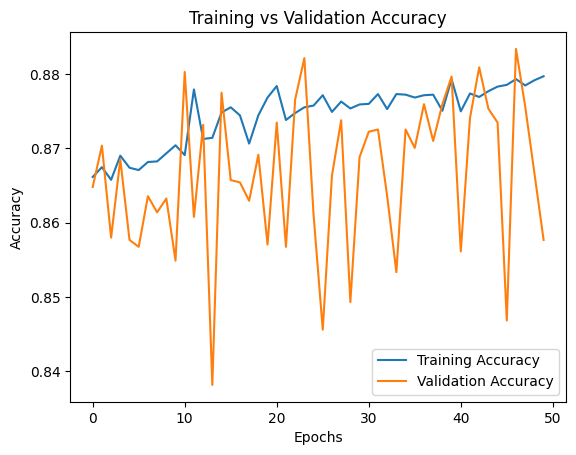

In [53]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [54]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"테스트 데이터 정확도: {test_acc:.4f}")


101/101 [==============================] - 0s 1ms/step - loss: 0.4445 - accuracy: 0.8577
테스트 데이터 정확도: 0.8577


## 혼동행렬

101/101 [==============================] - 0s 3ms/step


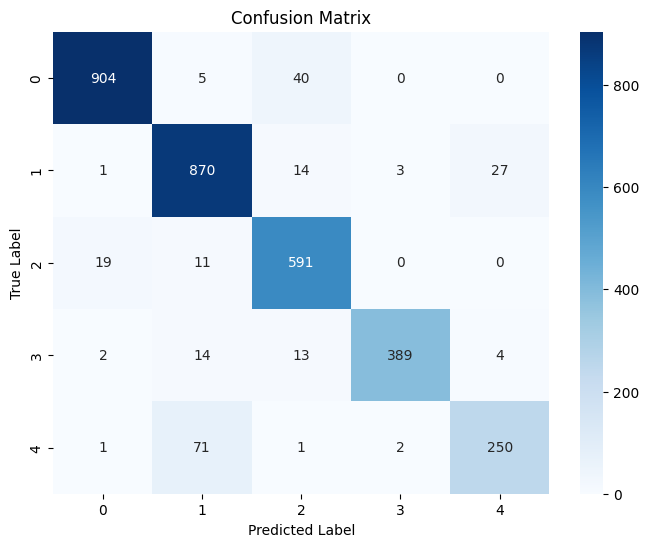

In [58]:
# 예측값 생성
y_pred = np.argmax(model.predict(X_test), axis=1)

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## precision, recall, f1-score

In [52]:
print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [57]:
import random

X_test = X_test.reset_index(drop=True)

# 테스트 데이터에서 샘플 선택
index = random.randint(0, len(X_test) - 1)
sample = X_test.iloc[index].values.reshape(1, X_test.shape[1], 1)  # CNN 입력 형태로 변환
# 예측 수행
prediction = model.predict(sample)
predicted_label = np.argmax(prediction)

print(f"실제 라벨: {y_test.iloc[index]}")

print(f"예측된 라벨: {predicted_label}")

1/1 [==============================] - 0s 36ms/step
실제 라벨: 0
예측된 라벨: 0
